# 1. Import Lib

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.filters import meijering, sato, frangi
from cv2 import erode, dilate
from scipy.sparse import dok_matrix
import pandas as pd
import pandas
import networkx as nx

# 2. Import image

In [2]:
im = Image.open('/home/ipausers/hamzaoui/Downloads/wetransfer_louis-cohen-mfre-images_2024-06-17_0804/Image-1.tif')

In [3]:
imarray = np.array(im).astype(int) / (2**14 - 1)
print(imarray.shape)
print(imarray)
cmap = plt.cm.gray

(7111, 10017)
[[0.69956662 0.67039004 0.65671733 ... 0.05267655 0.         0.        ]
 [0.68754196 0.65891473 0.65159006 ... 0.05231032 0.         0.        ]
 [0.67863029 0.65647317 0.65104071 ... 0.05310383 0.         0.        ]
 ...
 [0.44283709 0.44106696 0.43160593 ... 0.08374535 0.08368431 0.08307392]
 [0.44228774 0.43252152 0.42129036 ... 0.         0.         0.        ]
 [0.43661112 0.41860465 0.41280596 ... 0.         0.         0.        ]]


In [ ]:
plt.imshow(imarray, cmap=cmap);

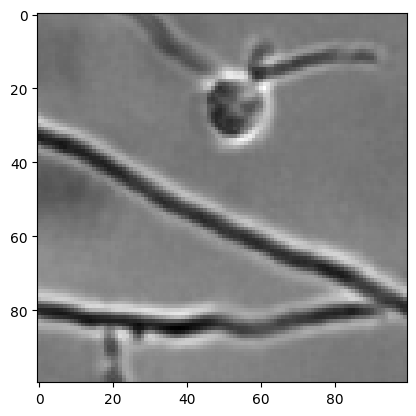

In [5]:
sampleim = imarray[2900:3000, 1000:1100]
plt.imshow(sampleim, cmap=cmap)

# 3. Filter

## 3.1 Frangi

### Sample

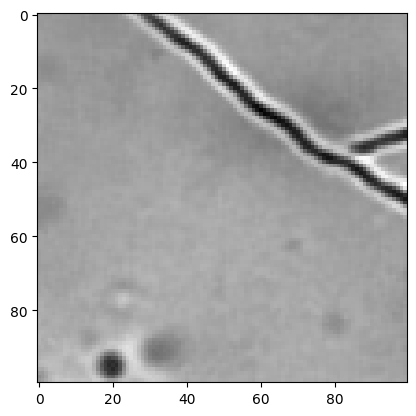

In [16]:
sampleim = imarray[1900:2000, 1900:2000]
plt.imshow(sampleim, cmap=cmap);

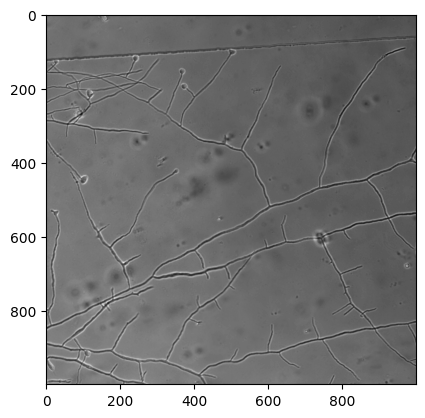

In [17]:
sampleim = imarray[1000:2000, 1000:2000]
plt.imshow(sampleim, cmap=cmap);

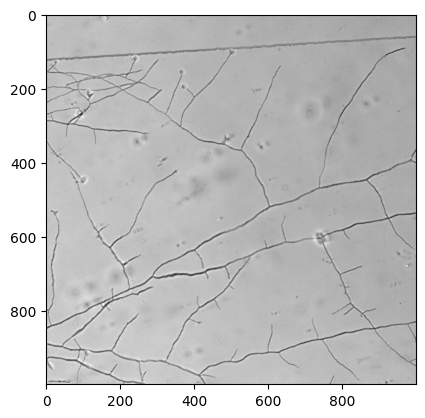

In [54]:
sampleim2 = sampleim - morphology.white_tophat(sampleim, morphology.disk(2))
sampleim2 = sampleim2 - morphology.black_tophat(sampleim2, morphology.disk(5))
plt.imshow(sampleim2, cmap=cmap);

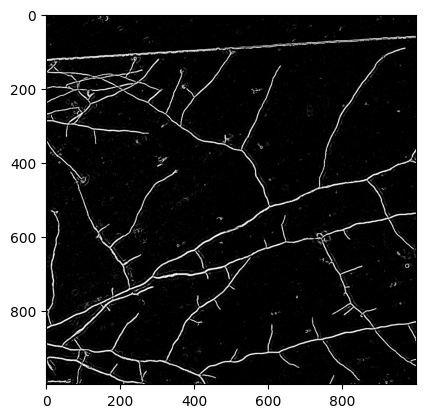

In [55]:
samplefrangiim2 = frangi(sampleim2, gamma=0.01)
plt.imshow(samplefrangiim2, cmap=cmap);

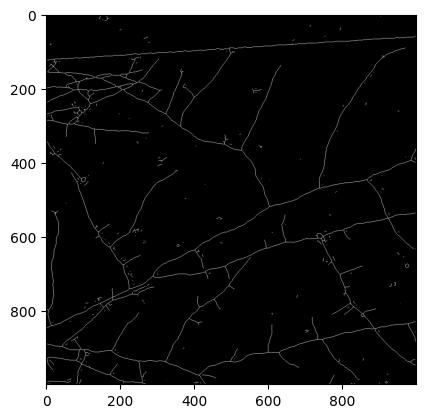

In [71]:
new_im = np.where(samplefrangiim2>0.5, 1, 0).astype(np.uint8)
new_im = dilate(new_im, np.ones((3, 3)), iterations=1)
new_im = morphology.skeletonize(new_im).astype(np.uint8)
plt.imshow(new_im, cmap=cmap)

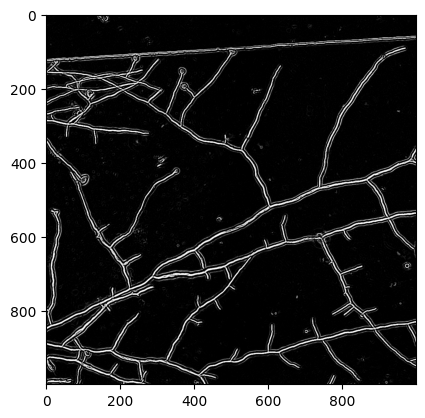

In [18]:
samplefrangiim = frangi(sampleim, gamma=0.01)
plt.imshow(samplefrangiim, cmap=cmap);

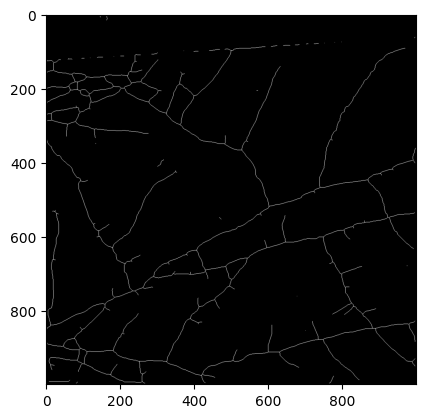

In [35]:
new_im = np.where(samplefrangiim>0.5, 1, 0).astype(np.uint8)
new_im = new_im - morphology.white_tophat(new_im, morphology.disk(1))
new_im = dilate(new_im, np.ones((7, 7)), iterations=1)
new_im = new_im - morphology.black_tophat(new_im, morphology.disk(2))
new_im = morphology.skeletonize(new_im)
plt.imshow(new_im, cmap=cmap)

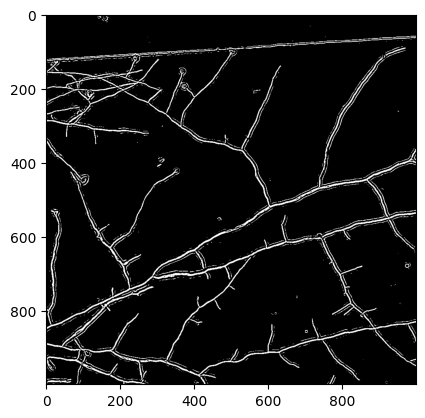

In [155]:
new_im = np.where(samplefrangiim>0.5, 1, 0).astype(np.uint8)
for i in range(1):
    new_im = new_im - morphology.white_tophat(new_im, morphology.disk(1))
    new_im = dilate(new_im, np.ones((7, 7)), iterations=1)
    new_im = new_im - morphology.black_tophat(new_im, morphology.disk(2))
    new_im = erode(new_im, np.ones((3, 3)), iterations=1)
new_im = morphology.skeletonize(new_im)
new_im = 1 - new_im

### Full Image

In [229]:
side = 1000
margin = 100

print(imarray.shape[0], imarray.shape[1])
rows = []
for i in range(margin, imarray.shape[0]-side-margin, side):
    row = []
    for j in range(margin, imarray.shape[1]-side-margin, side):
        print(i, j)
        sample = imarray[i-margin:i+side+margin, j-margin:j+side+margin]
        frangisample = frangi(sample, gamma=0.01)
        frangisample = np.where(frangisample>0.5, 1, 0).astype(np.uint8)
        frangisample = frangisample - morphology.white_tophat(frangisample, morphology.disk(1))
        frangisample = dilate(frangisample, np.ones((7,7)), iterations=1)
        frangisample = erode(frangisample, np.ones((3,3)), iterations=1)
        frangisample = frangisample[margin:side+margin, margin:side+margin]
        row.append(frangisample)
    rows.extend(np.concatenate(row, axis=1))
frangiim = np.array(rows)
frangiim = 1 - np.array(rows)

7111 10017
100 100
100 1100
100 2100
100 3100
100 4100
100 5100
100 6100
100 7100
100 8100
1100 100
1100 1100
1100 2100
1100 3100
1100 4100
1100 5100
1100 6100
1100 7100
1100 8100
2100 100
2100 1100
2100 2100
2100 3100
2100 4100
2100 5100
2100 6100
2100 7100
2100 8100
3100 100
3100 1100
3100 2100
3100 3100
3100 4100
3100 5100
3100 6100
3100 7100
3100 8100
4100 100
4100 1100
4100 2100
4100 3100
4100 4100
4100 5100
4100 6100
4100 7100
4100 8100
5100 100
5100 1100
5100 2100
5100 3100
5100 4100
5100 5100
5100 6100
5100 7100
5100 8100


In [230]:
frangi_pil = Image.fromarray(255*frangiim.astype(np.uint8))
frangi_pil.save("/home/ipausers/hamzaoui/Documents/Data/Louis_Segmentation/frangi_segmentation_with_tophat.jpeg")

In [234]:
frim = frangiim - morphology.white_tophat(frangiim, morphology.disk(3))
frangi_pil = Image.fromarray(255*frim.astype(np.uint8))
frangi_pil.save("/home/ipausers/hamzaoui/Documents/Data/Louis_Segmentation/frangi_segmentation_with_two_tophat.jpeg")

In [235]:
skim = 1-frangiim
skim = skim - morphology.black_tophat(skim, morphology.disk(3))
skim = morphology.skeletonize(skim)
skim = 1-skim
frangi_pil = Image.fromarray(255*skim.astype(np.uint8)) 
frangi_pil.save("/home/ipausers/hamzaoui/Documents/Data/Louis_Segmentation/frangi_skeleton.jpeg")

## 3.2 Meijering

### Sample

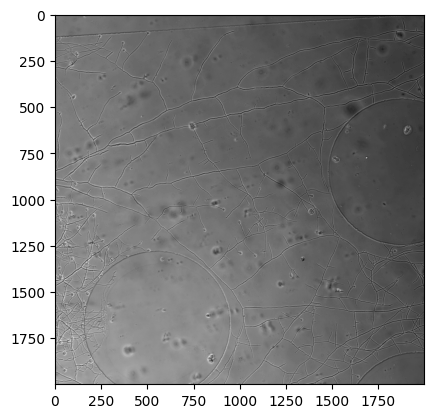

In [60]:
sampleim = imarray[1000:3000, 1000:3000]
plt.imshow(sampleim, cmap=cmap)

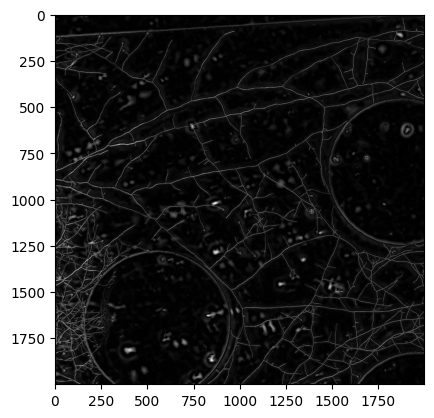

In [18]:
samplemeijeringim = meijering(sampleim)
plt.imshow(samplemeijeringim, cmap=cmap);

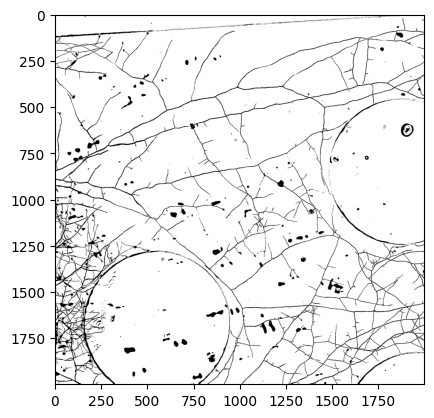

In [42]:
plt.imshow(np.where(samplemeijeringim>0.2, 0, 1), cmap=cmap);

### Full Image

In [ ]:
side = 1000
margin = 100

print(imarray.shape[0], imarray.shape[1])
rows = []
for i in range(margin, imarray.shape[0]-side-margin, side):
    row = []
    for j in range(margin, imarray.shape[1]-side-margin, side):
        print(i, j)
        sample = imarray[i-margin:i+side+margin, j-margin:j+side+margin]
        meijeringsample = meijering(sample)[margin:side+margin, margin:side+margin]
        row.append(meijeringsample)
    rows.extend(np.concatenate(row, axis=1))
meijeringim = np.array(rows)

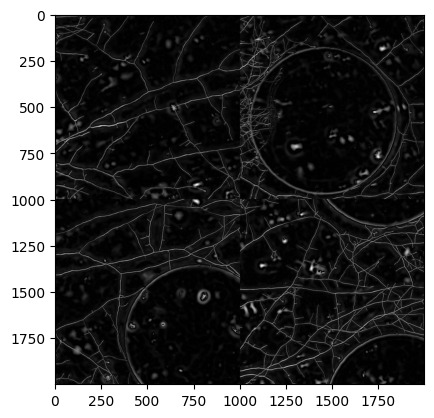

In [43]:
plt.imshow(meijeringim[900:2900, 900:2900], cmap=cmap);

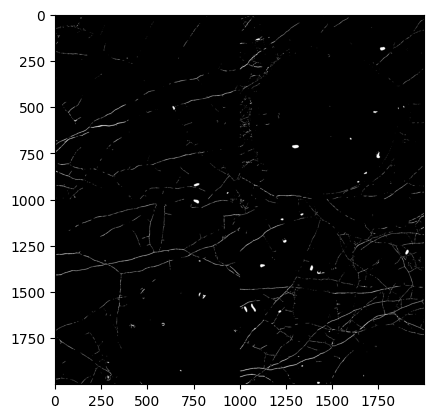

In [44]:
plt.imshow(np.where(meijeringim[1000:3000, 1000:3000]>0.04, 0, 1), cmap=cmap);

In [ ]:
frangi_pil = Image.fromarray(frangiim).convert('RGB')
frangi_pil.save("/home/ipausers/hamzaoui/Documents/Data/Louis_Segmentation/meijering_segmentation.jpeg")

## 3.3 Sato

### Sample

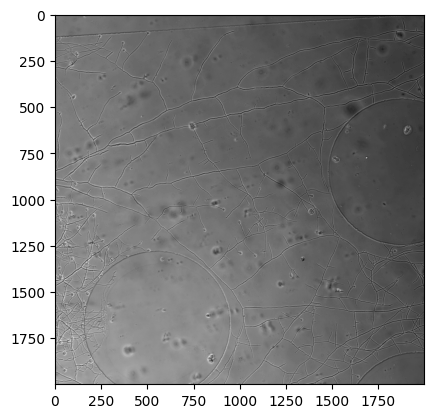

In [25]:
sampleim = imarray[1000:3000, 1000:3000]
plt.imshow(sampleim, cmap=cmap)

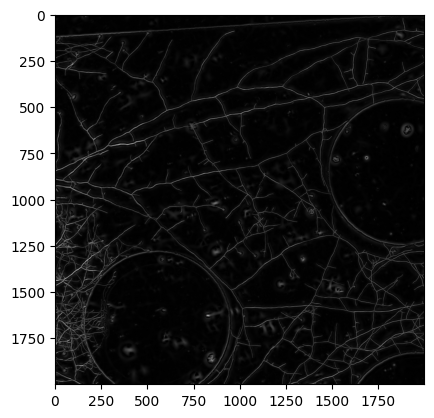

In [26]:
samplesatoim = sato(sampleim)
plt.imshow(samplesatoim, cmap=cmap);

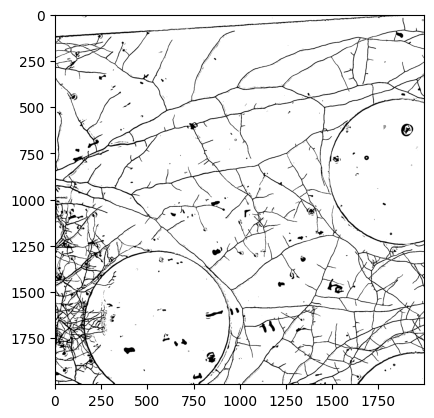

In [125]:
plt.imshow(np.where(samplesatoim>0.02, 0, 1), cmap=cmap);

## 3.4 Anisotropic Diffusion Filter

### Func

In [159]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as flt
import numpy as np
import scipy.ndimage.filters as flt
import warnings

def anisodiff(img,niter=1,kappa=50,gamma=0.1,step=(1.,1.),sigma=0, option=1,ploton=False):
	"""
	Anisotropic diffusion.

	Usage:
	imgout = anisodiff(im, niter, kappa, gamma, option)

	Arguments:
	        img    - input image
	        niter  - number of iterations
	        kappa  - conduction coefficient 20-100 ?
	        gamma  - max value of .25 for stability
	        step   - tuple, the distance between adjacent pixels in (y,x)
	        option - 1 Perona Malik diffusion equation No 1
	                 2 Perona Malik diffusion equation No 2
	        ploton - if True, the image will be plotted on every iteration

	Returns:
	        imgout   - diffused image.

	kappa controls conduction as a function of gradient.  If kappa is low
	small intensity gradients are able to block conduction and hence diffusion
	across step edges.  A large value reduces the influence of intensity
	gradients on conduction.

	gamma controls speed of diffusion (you usually want it at a maximum of
	0.25)

	step is used to scale the gradients in case the spacing between adjacent
	pixels differs in the x and y axes

	Diffusion equation 1 favours high contrast edges over low contrast ones.
	Diffusion equation 2 favours wide regions over smaller ones.

	Reference: 
	P. Perona and J. Malik. 
	Scale-space and edge detection using ansotropic diffusion.
	IEEE Transactions on Pattern Analysis and Machine Intelligence, 
	12(7):629-639, July 1990.

	Original MATLAB code by Peter Kovesi  
	School of Computer Science & Software Engineering
	The University of Western Australia
	pk @ csse uwa edu au
	<http://www.csse.uwa.edu.au>

	Translated to Python and optimised by Alistair Muldal
	Department of Pharmacology
	University of Oxford
	<alistair.muldal@pharm.ox.ac.uk>

	June 2000  original version.       
	March 2002 corrected diffusion eqn No 2.
	July 2012 translated to Python
	"""

	# ...you could always diffuse each color channel independently if you
	# really want
	if img.ndim == 3:
		warnings.warn("Only grayscale images allowed, converting to 2D matrix")
		img = img.mean(2)

	# initialize output array
	img = img.astype('float32')
	imgout = img.copy()

	# initialize some internal variables
	deltaS = np.zeros_like(imgout)
	deltaE = deltaS.copy()
	NS = deltaS.copy()
	EW = deltaS.copy()
	gS = np.ones_like(imgout)
	gE = gS.copy()

	# create the plot figure, if requested
	if ploton:
		import pylab as pl
		from time import sleep

		fig = pl.figure(figsize=(20,5.5),num="Anisotropic diffusion")
		ax1,ax2 = fig.add_subplot(1,2,1),fig.add_subplot(1,2,2)

		ax1.imshow(img,interpolation='nearest')
		ih = ax2.imshow(imgout,interpolation='nearest',animated=True)
		ax1.set_title("Original image")
		ax2.set_title("Iteration 0")

		fig.canvas.draw()

	for ii in np.arange(1,niter):

		# calculate the diffs
		deltaS[:-1,: ] = np.diff(imgout,axis=0)
		deltaE[: ,:-1] = np.diff(imgout,axis=1)

		if 0<sigma:
			deltaSf=flt.gaussian_filter(deltaS,sigma);
			deltaEf=flt.gaussian_filter(deltaE,sigma);
		else: 
			deltaSf=deltaS;
			deltaEf=deltaE;
			
		# conduction gradients (only need to compute one per dim!)
		if option == 1:
			gS = np.exp(-(deltaSf/kappa)**2.)/step[0]
			gE = np.exp(-(deltaEf/kappa)**2.)/step[1]
		elif option == 2:
			gS = 1./(1.+(deltaSf/kappa)**2.)/step[0]
			gE = 1./(1.+(deltaEf/kappa)**2.)/step[1]

		# update matrices
		E = gE*deltaE
		S = gS*deltaS

		# subtract a copy that has been shifted 'North/West' by one
		# pixel. don't as questions. just do it. trust me.
		NS[:] = S
		EW[:] = E
		NS[1:,:] -= S[:-1,:]
		EW[:,1:] -= E[:,:-1]

		# update the image
		imgout += gamma*(NS+EW)

		if ploton:
			iterstring = "Iteration %i" %(ii+1)
			ih.set_data(imgout)
			ax2.set_title(iterstring)
			fig.canvas.draw()
			# sleep(0.01)

	return imgout

# 4. Segmented Image to Graph

## 4.0 Functions

In [20]:
def extract_branches(doc_skel):
    def get_neighbours(pixel):
        x = pixel[0]
        y = pixel[1]
        primary_neighbours = {(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)}
        secondary_neighbours = {
            (x + 1, y - 1),
            (x + 1, y + 1),
            (x - 1, y + 1),
            (x - 1, y - 1),
        }
        num_neighbours = 0
        actual_neighbours = []
        for neighbour in primary_neighbours:
            if neighbour in non_zero_pixel:
                num_neighbours += 1
                xp = neighbour[0]
                yp = neighbour[1]
                primary_neighboursp = {
                    (xp + 1, yp),
                    (xp - 1, yp),
                    (xp, yp + 1),
                    (xp, yp - 1),
                }
                for neighbourp in primary_neighboursp:
                    secondary_neighbours.discard(neighbourp)
                actual_neighbours.append(neighbour)
        for neighbour in secondary_neighbours:
            if neighbour in non_zero_pixel:
                num_neighbours += 1
                actual_neighbours.append(neighbour)
        return (actual_neighbours, num_neighbours)

    pixel_branch_dic = {pixel: set() for pixel in doc_skel.keys()}
    is_node = {pixel: False for pixel in doc_skel.keys()}
    pixel_set = set(doc_skel.keys())
    non_zero_pixel = doc_skel
    new_index = 1
    non_explored_direction = set()
    while len(pixel_set) > 0:
        is_new_start = len(non_explored_direction) == 0
        if is_new_start:
            pixel = pixel_set.pop()
        else:
            pixel = non_explored_direction.pop()
        actual_neighbours, num_neighbours = get_neighbours(pixel)
        if is_new_start:
            if num_neighbours == 2:
                new_index += 1
                pixel_branch_dic[pixel] = {new_index}
        is_node[pixel] = num_neighbours in [0, 1, 3, 4]
        pixel_set.discard(pixel)
        #!!! This is to solve the two neighbours nodes problem
        if is_node[pixel]:
            for neighbour in actual_neighbours:
                if is_node[neighbour]:
                    new_index += 1
                    pixel_branch_dic[pixel].add(new_index)
                    pixel_branch_dic[neighbour].add(new_index)
            continue
        else:
            for neighbour in actual_neighbours:
                if neighbour in pixel_set:
                    non_explored_direction.add(neighbour)
                pixel_branch_dic[neighbour] = pixel_branch_dic[neighbour].union(
                    pixel_branch_dic[pixel]
                )
    return (pixel_branch_dic, is_node, new_index)

def get_neighbours2(pixel, xs, ys):
    x = pixel[0]
    y = pixel[1]
    primary_neighbours = {(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)}
    secondary_neighbours = {
        (x + 1, y - 1),
        (x + 1, y + 1),
        (x - 1, y + 1),
        (x - 1, y - 1),
    }
    pixel_list = [(x, ys[i]) for i, x in enumerate(xs)]
    num_neighbours = 0
    actual_neighbours = set()
    for neighbour in primary_neighbours:
        if neighbour in pixel_list:
            xp = neighbour[0]
            yp = neighbour[1]
            primary_neighboursp = {
                (xp + 1, yp),
                (xp - 1, yp),
                (xp, yp + 1),
                (xp, yp - 1),
            }
            for neighbourp in primary_neighboursp:
                secondary_neighbours.discard(neighbourp)
            actual_neighbours.add(neighbour)
    for neighbour in secondary_neighbours:
        if neighbour in pixel_list:
            actual_neighbours.add(neighbour)
    return actual_neighbours

def order_pixel(pixel_begin, pixel_end, pixel_list):
    ordered_list = [pixel_begin]
    current_pixel = pixel_begin
    precedent_pixel = pixel_begin
    xs = [pixel[0] for pixel in pixel_list]
    ys = [pixel[1] for pixel in pixel_list]

    while current_pixel != pixel_end:
        neighbours = get_neighbours2(current_pixel, np.array(xs), np.array(ys))
        neighbours.discard(precedent_pixel)
        precedent_pixel = current_pixel
        current_pixel = neighbours.pop()
        ordered_list.append(current_pixel)
    return ordered_list

def from_sparse_to_graph(doc_skel):
    column_names = ["origin", "end", "pixel_list"]
    graph = pd.DataFrame(columns=column_names)
    pixel_branch_dic, is_node, new_index = extract_branches(doc_skel)
    nodes = []
    edges = {}
    for pixel in pixel_branch_dic:
        for branch in pixel_branch_dic[pixel]:
            right_branch = branch
            if right_branch not in edges.keys():
                edges[right_branch] = {"origin": [], "end": [], "pixel_list": [[]]}
            if is_node[pixel]:
                if len(edges[right_branch]["origin"]) == 0:
                    edges[right_branch]["origin"] = [pixel]
                else:
                    edges[right_branch]["end"] = [pixel]
            edges[right_branch]["pixel_list"][0].append(pixel)
    for branch in edges:
        if len(edges[branch]["origin"]) > 0 and len(edges[branch]["end"]) > 0:
            # TODO(FK): Use pandas.concat instead (Frame.append soon deprecated)
            # graph = graph.append(pd.DataFrame(edges[branch]), ignore_index=True)
            graph = pandas.concat([graph, pd.DataFrame(edges[branch])])
    for index, row in graph.iterrows():
        row["pixel_list"] = order_pixel(row["origin"], row["end"], row["pixel_list"])
    return graph

def generate_set_node(graph_tab):
    nodes = set()
    for index, row in graph_tab.iterrows():
        nodes.add(row["origin"])
        nodes.add(row["end"])
    return sorted(nodes)


def generate_nx_graph(graph_tab, labeled=False):
    G = nx.Graph()
    pos = {}
    if not labeled:
        nodes = generate_set_node(graph_tab)
    for index, row in graph_tab.iterrows():
        if labeled:
            identifier1 = row["origin_label"]
            identifier2 = row["end_label"]
            pos[identifier1] = np.array(row["origin_pos"]).astype(np.int32)
            pos[identifier2] = np.array(row["end_pos"]).astype(np.int32)
        else:
            identifier1 = nodes.index(row["origin"])
            identifier2 = nodes.index(row["end"])
            pos[identifier1] = np.array(row["origin"]).astype(np.int32)
            pos[identifier2] = np.array(row["end"]).astype(np.int32)
        info = {"weight": len(row["pixel_list"]), "pixel_list": row["pixel_list"]}
        G.add_edges_from([(identifier1, identifier2, info)])
    return (G, pos)

## 4.1 From Frangi

In [76]:
im = Image.open("/home/ipausers/hamzaoui/Documents/Data/Louis_Segmentation/frangi_skeleton.jpeg")
imarray = np.where(np.array(im)< 122, 1, 0)
print(imarray.shape)
print(imarray)
cmap = plt.cm.gray

(6000, 9000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [85]:
skeleton = dok_matrix(imarray[:, :])
graph, pos = generate_nx_graph(from_sparse_to_graph(skeleton))

In [88]:
Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
G0 = graph.subgraph(Gcc[0])

In [94]:
G0b = nx.Graph()
for u, v, e in G0.edges(data=True):
    if (G0.degree[u]==1 or G0.degree[v]==1) and len(e["pixel_list"]) < 10:
        continue
    G0b.add_edge(u, v, **e)

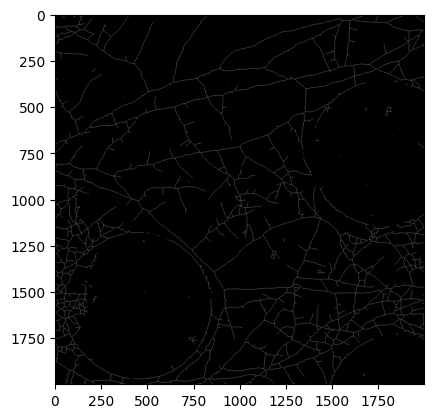

In [82]:
plt.imshow(imarray[1000:3000, 1000:3000], cmap=cmap)

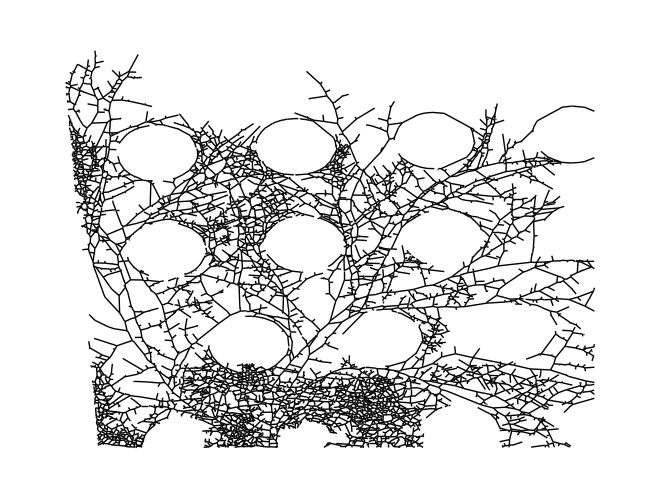

In [ ]:
nx.draw(G0, pos, node_size=0)

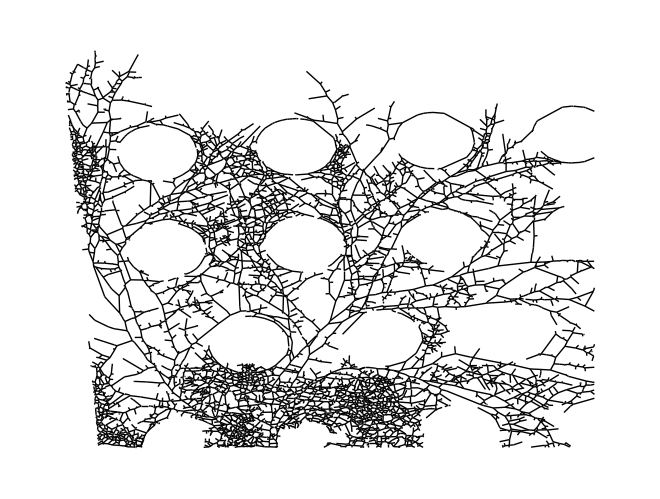

In [95]:
nx.draw(G0b, pos, node_size=0)

## 4.2

# 5.